# Simple Lorenz Simulator in NumPy

The Lorenz equations are a prototypical example of **deterministic chaos**. They
are a system of three **nonlinear** ODEs

$$
\begin{aligned}
\frac{dx}{dt} &= \sigma(y - x), \\
\frac{dy}{dt} &= x(\rho - z) - y, \\
\frac{dz}{dt} &= xy - \beta z.
\end{aligned}
$$

The three variables can be combined into the state vector $u = (x, y, z) \in
\mathbb{R}^3$. Given an initial state $u^{[0]}$, we can simulate a trajectory by
recursively applying a simulator to it

$$
u^{[t+1]} = \mathcal{P}(u^{[t]}).
$$

Here, this simulator will be due to the Runge-Kutta 4 method. Writing the
right-hand side of the Lorenz equation as $\frac{du}{dt} = f(u)$, the scheme
reads

$$
\begin{aligned}
k_1 &= f(u^{[t]}), \\
k_2 &= f(u^{[t]} + \frac{\Delta t}{2} k_1), \\
k_3 &= f(u^{[t]} + \frac{\Delta t}{2} k_2), \\
k_4 &= f(u^{[t]} + \Delta t \, k_3), \\
u^{[t+1]} &= u^{[t]} + \frac{\Delta t}{6} (k_1 + 2k_2 + 2k_3 + k_4).
\end{aligned}
$$

We can then display the trajectory $ \{ u^{[0]}, u^{[1]}, \dots, u^{[T]} \} $ in
3D space which is the classical butterfly shape.

We will use the settings as in the original paper by Lorenz (1), i.e. $\sigma = 10$,
$\rho = 28$ and $\beta = 8/3$ together with $\Delta t = 0.01$.

---

(1) E. N. Lorenz, "Deterministic Nonperiodic Flow", Journal of the Atmospheric
Sciences, 1963,
https://journals.ametsoc.org/view/journals/atsc/20/2/1520-0469_1963_020_0130_dnf_2_0_co_2.xml

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def lorenz_rhs(u, *, sigma, rho, beta):
    x, y, z = u
    x_dot = sigma * (y - x)
    y_dot = x * (rho - z) - y
    z_dot = x * y - beta * z
    u_dot = np.array([x_dot, y_dot, z_dot])
    return u_dot

In [3]:
class LorenzStepperRK4:
    def __init__(self, dt=0.01, *, sigma=10, rho=28, beta=8/3):
        self.dt = dt
        self.sigma = sigma
        self.rho = rho
        self.beta = beta
    
    def __call__(self, u_prev):
        lorenz_rhs_fixed = lambda u: lorenz_rhs(
            u,
            sigma=self.sigma,
            rho=self.rho,
            beta=self.beta,
        )
        k_1 = lorenz_rhs_fixed(u_prev)
        k_2 = lorenz_rhs_fixed(u_prev + 0.5 * self.dt * k_1)
        k_3 = lorenz_rhs_fixed(u_prev + 0.5 * self.dt * k_2)
        k_4 = lorenz_rhs_fixed(u_prev + self.dt * k_3)
        u_next = u_prev + self.dt * (k_1 + 2*k_2 + 2*k_3 + k_4)/6
        return u_next

In [4]:
lorenz_stepper = LorenzStepperRK4()

In [5]:
u_0 = np.ones(3)

In [6]:
u_0

array([1., 1., 1.])

In [7]:
lorenz_stepper(u_0)

array([1.01256719, 1.2599178 , 0.98489097])

In [8]:
trj = [u_0,]
u_current = u_0
for i in range(5000):
    u_current = lorenz_stepper(u_current)
    trj.append(u_current)
trj = np.array(trj)

In [9]:
trj.shape

(5001, 3)

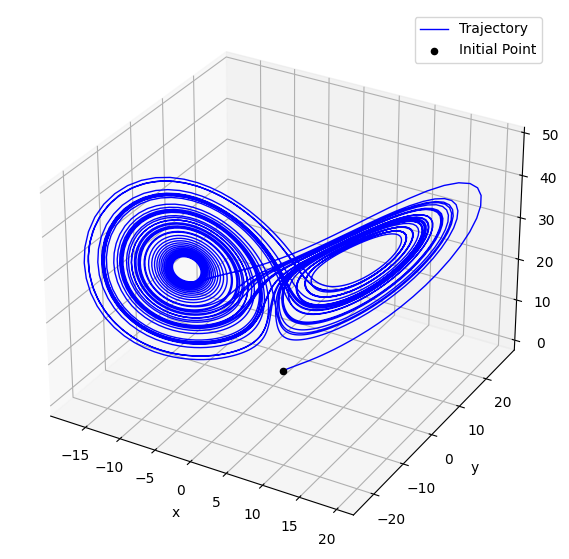

In [10]:
fig, ax = plt.subplots(
    subplot_kw={"projection": "3d"},
    figsize=(7, 7),
)

ax.plot(
    trj[:, 0],
    trj[:, 1],
    trj[:, 2],
    lw=1.0,
    color="blue",
    label="Trajectory",
)
ax.scatter3D(
    trj[0, 0],
    trj[0, 1],
    trj[0, 2],
    color="black",
    label="Initial Point",
)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.legend()

## Lorenz Map: The Ratio of two subsequent Z peaks

<img src="https://github.com/user-attachments/assets/2aeb8b11-cd57-4220-95cc-cd482c6f4a2e" width="500">

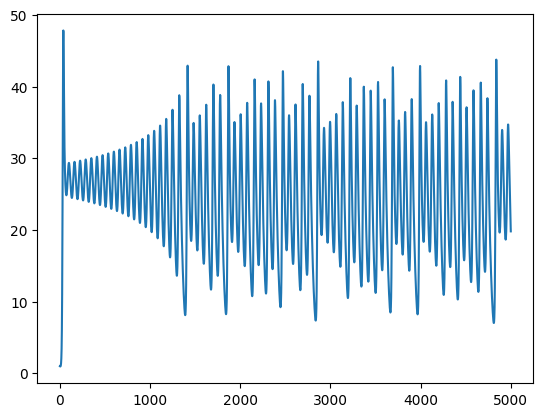

In [12]:
plt.plot(trj[:, 2])

In [13]:
def find_maxima_in_z(trj_):
    z_trj_left = trj_[:-2, 2]
    z_trj_center = trj_[1:-1, 2]
    z_trj_right = trj_[2:, 2]

    is_maximum = (z_trj_center > z_trj_left) & (z_trj_center > z_trj_right)

    maximal_values = z_trj_center[is_maximum]
    return maximal_values

In [14]:
maximal_values = find_maxima_in_z(trj)

In [15]:
maximal_values

array([47.83395409, 29.36240375, 29.50787402, 29.66778055, 29.8386822 ,
       30.022775  , 30.22673662, 30.44215632, 30.68044832, 30.93415225,
       31.21724268, 31.5281195 , 31.88317653, 32.26704561, 32.70989961,
       33.23402216, 33.83646591, 34.56556903, 35.5045012 , 36.77221969,
       38.80199922, 42.92454982, 34.93494587, 35.98909192, 37.47434236,
       40.29746576, 38.83803371, 42.84714678, 35.06190935, 36.14202622,
       37.7404808 , 41.00695684, 37.65943026, 40.72635095, 38.10987943,
       42.1560951 , 36.00432657, 37.50902094, 40.36415276, 38.7315204 ,
       43.512836  , 34.25633986, 35.09352224, 36.18857171, 37.83107326,
       41.18613828, 37.35640071, 39.99017213, 39.44465948, 40.65102402,
       38.22409455, 42.70507362, 35.28146027, 36.46545076, 38.25826493,
       42.88046854, 35.04138583, 36.12125062, 37.70424618, 40.86560187,
       37.88103399, 41.36044896, 37.11999061, 39.48696267, 40.56281688,
       38.38258817, 43.76879562, 33.96313546, 34.72400756])

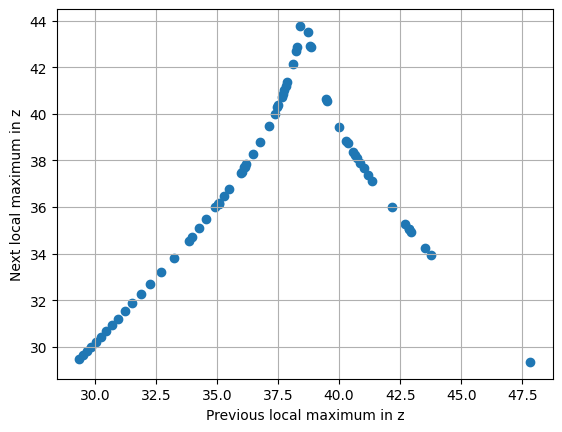

In [17]:
plt.scatter(maximal_values[:-1], maximal_values[1:])
plt.xlabel("Previous local maximum in z")
plt.ylabel("Next local maximum in z")
plt.grid()